In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=196c2dfa948aae0a6302b88586443880324e0a571c7ff523785e5cd4015cb7e2
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
# Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import functions as fn


In [ ]:
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.system('cp "/content/drive/MyDrive/US_Accidents_March23.csv" .')

# Read the CSV file into a Spark DataFrame
us_acci = spark.read.csv('US_Accidents_March23.csv', header=True, inferSchema=True)


In [ ]:
us_acci.head()

Row(ID='A-1', Source='Source2', Severity=3, Start_Time=datetime.datetime(2016, 2, 8, 5, 46), End_Time=datetime.datetime(2016, 2, 8, 11, 0), Start_Lat=39.865147, Start_Lng=-84.058723, End_Lat=None, End_Lng=None, Distance(mi)=0.01, Description='Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.', Street='I-70 E', City='Dayton', County='Montgomery', State='OH', Zipcode='45424', Country='US', Timezone='US/Eastern', Airport_Code='KFFO', Weather_Timestamp=datetime.datetime(2016, 2, 8, 5, 58), Temperature(F)=36.9, Wind_Chill(F)=None, Humidity(%)=91.0, Pressure(in)=29.68, Visibility(mi)=10.0, Wind_Direction='Calm', Wind_Speed(mph)=None, Precipitation(in)=0.02, Weather_Condition='Light Rain', Amenity=False, Bump=False, Crossing=False, Give_Way=False, Junction=False, No_Exit=False, Railway=False, Roundabout=False, Station=False, Stop=False, Traffic_Calming=False, Traffic_Signal=False, Turning_Loop=False, Sunrise_Sunset='Night', Civil_Twilight='Night', Nautical_

In [ ]:
print('Shape is ',(us_acci.count(),len(us_acci.columns)))

Shape is  (7728394, 46)


In [ ]:
# Renaming the columns names which contain brackets for ease of usage

us_acci = us_acci.select('*').withColumnRenamed('Distance(mi)','Distance')\
    .withColumnRenamed('Temperature(F)', 'Temperature').withColumnRenamed('Wind_Chill(F)', 'Wind_Chill')\
    .withColumnRenamed('Humidity(%)', 'Humidity').withColumnRenamed('Pressure(in)', 'Pressure')\
    .withColumnRenamed('Visibility(mi)', 'Visibility').withColumnRenamed('Wind_Speed(mph)', 'Wind_Speed')\
    .withColumnRenamed('Precipitation(in)', 'Precipitation')

In [ ]:
# Schema of dataframe with datatypes of all columns

us_acci.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Start_Time: timestamp (nullable = true)
 |-- End_Time: timestamp (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- End_Lat: double (nullable = true)
 |-- End_Lng: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Description: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Airport_Code: string (nullable = true)
 |-- Weather_Timestamp: timestamp (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Wind_Chill: double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- Pressure: double (nullable = true)
 |-- Visibility: double

In [ ]:
# Summary of all numerical variables in the dataset to find the skewness, outliers, mean, median

us_acci.describe().toPandas()

,summary,ID,Source,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance,Description,...,Pressure,Visibility,Wind_Direction,Wind_Speed,Precipitation,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,count,7728394,7728394,7728394,7728394,7728394,4325632,4325632,7728394,7728389,...,7587715,7551296,7553188,7157161,5524808,7554935,7705148,7705148,7705148,7705148
1,mean,None,None,2.212384487643875,36.20119454946952,-94.70254538794683,36.26182889161967,-95.72557026006884,0.5618422831523706,1096.6666666666667,...,29.538985607656194,9.090376447963413,None,7.685489595665597,0.008407209807109432,None,None,None,None,None
2,stddev,None,None,0.4875313339360398,5.076079113874013,17.39175625334916,5.272904539384689,18.10792763629359,1.7768106031970923,171.95146900305244,...,1.00618980914562,2.68831592141714,None,5.424983437161068,0.11022464885795538,None,None,None,None,None
3,min,A-1,Source1,1,24.5548,-124.623833,24.566013,-124.545748,0.0,1039 GOLDEN BEAR - BOT,...,0.0,0.0,CALM,0.0,0.0,Blowing Dust,Day,Day,Day,Day
4,max,A-999999,Source3,4,49.002201,-67.113167,49.075,-67.10924200000001,441.75,VEHICLE CRASH I77 SB NEAR LAKEVIEW ROAD THAT ...,...,58.63,140.0,West,1087.0,36.47,Wintry Mix / Windy,Night,Night,Night,Night


In [ ]:
# Columns to be dropped initially as a list
drop_col = ['ID','End_Lat','End_Lng','Description','Number','Street','Zipcode','Airport_Code','Country','Weather_Timestamp','Wind_Chill','Turning_Loop']


In [ ]:

# Dropping columns from the original dataset

us_acci = us_acci.drop(*(drop_col))

In [ ]:
# Replacing same Wind_Direction named with different string N and North same

us_acci = us_acci.withColumn('Wind_Direction', when(us_acci.Wind_Direction == 'E', 'East')\
                   .when(us_acci.Wind_Direction == 'W', 'West')\
                   .when(us_acci.Wind_Direction == 'N', 'North')\
                   .when(us_acci.Wind_Direction == 'S', 'South')\
                   .when(us_acci.Wind_Direction == 'VAR', 'Variable')\
                   .when(us_acci.Wind_Direction == 'CALM', 'Calm')\
                   .otherwise(us_acci.Wind_Direction))

In [ ]:
# Replacing same Weather_Condition named with different string Light Rain Shower and Light Rain Showers same

us_acci = us_acci.withColumn('Weather_Condition', when(us_acci.Weather_Condition == 'Light Rain Shower', 'Light Rain Showers')\
                   .when(us_acci.Weather_Condition == 'Light Snow Shower', 'Light Snow Showers')\
                   .when(us_acci.Weather_Condition == 'Rain Shower', 'Rain Showers')\
                   .otherwise(us_acci.Weather_Condition))

In [ ]:
# Dropping Null rows from City Column as there are only 30 rows with City = Null

us_acci = us_acci.where(col("city").isNotNull())

In [ ]:
# Dropping Null rows from Timezone Column

us_acci = us_acci.where(col("Timezone").isNotNull())

In [ ]:
# Clipping Temperature extreme values to suppress outliers

lower = -30
upper = 115
us_acci = us_acci.withColumn('Temperature', when(us_acci.Temperature > upper, upper)\
                  .when(us_acci.Temperature < lower, lower).otherwise(us_acci.Temperature).alias('Temperature'))

In [ ]:
# Distance > 100 rows dropped
us_acci = us_acci.where(us_acci.Distance <100)

In [ ]:
# Clipping Visibility extreme values to suppress outliers

upper = 20
us_acci = us_acci.withColumn('Visibility', when(us_acci.Visibility > upper, upper)\
                  .otherwise(us_acci.Visibility).alias('Visibility'))

In [ ]:
# Clipping Wind_Speed extreme values to suppress outliers
upper = 40
us_acci = us_acci.withColumn('Wind_Speed', when(us_acci.Wind_Speed > upper, upper)\
                  .otherwise(us_acci.Wind_Speed).alias('Wind_Speed'))

In [ ]:
# Replacing Null values in Precipitation with 0

us_acci = us_acci.withColumn('Precipitation', when(us_acci.Precipitation.isNull(), 0).otherwise(us_acci.Precipitation))

In [ ]:
#replacing missing values in categorical attributes with the mode of the corresponding variables

for col_name in ['Wind_Direction', 'Weather_Condition']:
    common = us_acci.dropna().groupBy(col_name).agg(fn.count('*')).orderBy('count(1)', ascending = False).first()[col_name]
    us_acci = us_acci.withColumn(col_name, when(isnull(col_name), common).otherwise(us_acci[col_name]))

In [ ]:
# Replacing missing values in numerical attributes with the median of the corresponding variables

for col_name in ['Temperature', 'Humidity', 'Pressure', 'Visibility', 'Wind_Speed']:
    median = us_acci.dropna().approxQuantile(col_name, [0.5], 0.00)[0]
    us_acci = us_acci.withColumn(col_name, when(isnull(col_name), median).otherwise(us_acci[col_name]))

In [ ]:
# Removing Null values in last 4 columns

us_acci = us_acci.filter(us_acci.Sunrise_Sunset.isNotNull())

us_acci = us_acci.filter(us_acci.Civil_Twilight.isNotNull())

us_acci = us_acci.filter(us_acci.Nautical_Twilight.isNotNull())

us_acci = us_acci.filter(us_acci.Astronomical_Twilight.isNotNull())

In [ ]:
# Adding Month of Year, Day of Week , Week of Year and Hour of the Day Column from Start Time

us_acci = us_acci.withColumn("Start_Time",to_timestamp(col("Start_Time"))).withColumn("month_of_year", date_format(col("Start_Time"), "MMMM")).withColumn("day_of_week", date_format(col("Start_Time"), "EEEE")).withColumn("hour_day", date_format(col("Start_Time"), "H")).withColumn("week_of_year", date_format(col("Start_Time"), "w"))

In [ ]:
# Distance > 100 rows dropped
us_acci = us_acci.where(us_acci.Distance <100)

In [ ]:
# Clipping Visibility extreme values to suppress outliers

upper = 20
us_acci = us_acci.withColumn('Visibility', when(us_acci.Visibility > upper, upper)\
                  .otherwise(us_acci.Visibility).alias('Visibility'))

In [ ]:
# Clipping Wind_Speed extreme values to suppress outliers
upper = 40
us_acci = us_acci.withColumn('Wind_Speed', when(us_acci.Wind_Speed > upper, upper)\
                  .otherwise(us_acci.Wind_Speed).alias('Wind_Speed'))

In [ ]:
# Adding Month of Year, Day of Week , Week of Year and Hour of the Day Column from Start Time

us_acci = us_acci.withColumn("Start_Time",to_timestamp(col("Start_Time"))).withColumn("month_of_year", date_format(col("Start_Time"), "MMMM")).withColumn("day_of_week", date_format(col("Start_Time"), "EEEE")).withColumn("hour_day", date_format(col("Start_Time"), "H")).withColumn("week_of_year", date_format(col("Start_Time"), "w"))

In [ ]:
# Distribution of Severity
severity_count = uc_acci.groupBy("Severity").count().orderBy("Severity")
severity_count.show()

+--------+------+
|Severity| count|
+--------+------+
|       1|  3880|
|       2|100316|
|       3| 53674|
|       4|   987|
+--------+------+



<ipython-input-8-2f3faf2308fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Severity', y='count', data=severity_count_pd, palette="viridis")


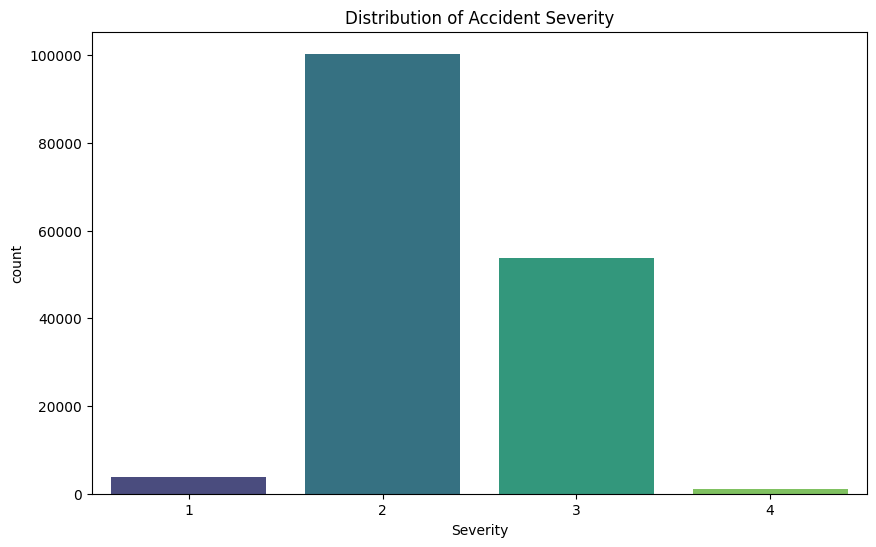

In [ ]:
# Convert severity count to Pandas for plotting
severity_count_pd = severity_count.toPandas()

# Plot severity distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Severity', y='count', data=severity_count_pd, palette="viridis")
plt.title('Distribution of Accident Severity')
plt.show()

In [ ]:
# Summary statistics for numeric columns
numeric_columns = [c for c, t in data.dtypes if t in ['int', 'double']]
summary_stats = us_acci.select([mean(col(c)).alias(c+'_mean') for c in numeric_columns] +
                            [stddev(col(c)).alias(c+'_stddev') for c in numeric_columns] +
                            [min(col(c)).alias(c+'_min') for c in numeric_columns] +
                            [max(col(c)).alias(c+'_max') for c in numeric_columns])
summary_stats.show()

+-----------------+-----------------+------------------+-------------------+-------------------+------------------+-----------------+------------------+-------------------+--------------------+----------------------+-----------------+-----------------+------------------+-------------------+---------------------+--------------------+------------------+-------------------+---------------------+----------------------+------------------------+------------+-------------+-------------+----------------+------------------+-----------------+---------------+----------------+------------------+-------------------+---------------------+------------+-------------+-------------+----------------+------------------+-----------------+---------------+----------------+------------------+-------------------+---------------------+
|    Severity_mean|   Start_Lat_mean|    Start_Lng_mean|  Distance(mi)_mean|Temperature(F)_mean|Wind_Chill(F)_mean| Humidity(%)_mean| Pressure(in)_mean|Visibility(mi)_mean|Wind_S

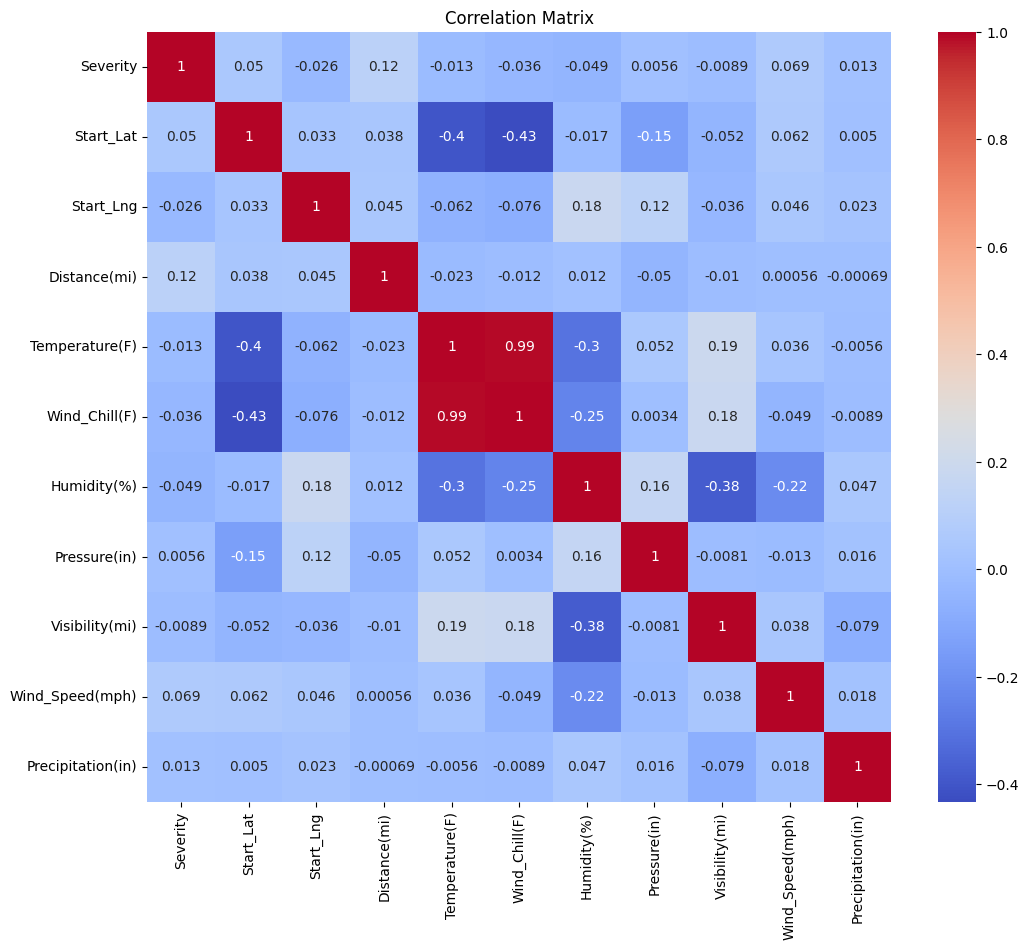

In [ ]:

# Show correlation matrix
numeric_data = uc_acci.select([col(c).cast("double") for c in numeric_columns])
corr_matrix = numeric_data.toPandas().corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# Clean up Spark session
spark.stop()
